In [268]:
import pandas as pd
import numpy as np

In [269]:
df_original = pd.read_csv('Lat_lng_data.csv')

In [270]:
df_original.head()

,Unnamed: 0,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,address,lat_lng,lat,lng
0,0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,"Bodakdev, Ahmedabad","[""23° 2' 40.53156'' N"", ""72° 31' 2.43840'' E""]","""23° 2' 40.53156'' N""","""72° 31' 2.43840'' E"""
1,1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,"CG Road, Ahmedabad","[""23° 1' 33.64752'' N"", ""72° 33' 24.04548'' E""]","""23° 1' 33.64752'' N""","""72° 33' 24.04548'' E"""
2,2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,"Jodhpur, Ahmedabad","[""23° 1' 0.93648'' N"", ""72° 31' 13.55412'' E""]","""23° 1' 0.93648'' N""","""72° 31' 13.55412'' E"""
3,3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,"Sanand, Ahmedabad","[""23° 1' 25.99536'' N"", ""72° 23' 6.53100'' E""]","""23° 1' 25.99536'' N""","""72° 23' 6.53100'' E"""
4,4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,"Navrangpura, Ahmedabad","[""23° 2' 9.59928'' N"", ""72° 33' 51.63444'' E""]","""23° 2' 9.59928'' N""","""72° 33' 51.63444'' E"""


In [271]:
from sklearn.preprocessing import OneHotEncoder

def prepareDataForLinReg(cluster):
    cluster = cluster.reset_index()
    st_df = cluster.drop(["lat","lng", "lat_lng", "index","locality", "Unnamed: 0",'seller_type','layout_type','property_type','furnish_type','address'], axis=1, errors='ignore')
    enc = OneHotEncoder(handle_unknown='ignore')
    en_frame = enc.fit_transform(cluster[['seller_type','layout_type','property_type','furnish_type']])
    column_name = enc.get_feature_names_out(['seller_type','layout_type','property_type','furnish_type'])
    en_df = pd.DataFrame.sparse.from_spmatrix(en_frame, columns=column_name)
    en_final_cluster = pd.concat([en_df,st_df], axis=1)
    return en_final_cluster

In [272]:
from math import cos, sin as cos, sin
def convertTo3D(lat, long):
    lat = lat.strip()
    long = long.strip()
    long = (int)(long[1:].split("°")[0])
    lat = (int)(lat[1:].split("°")[0])
    r = 1000
    x = r* cos(long) * sin(lat)
    y = r* sin(long) * sin(lat)
    z = r* cos(lat)
    
    return [x,y,z]

In [273]:
x=[]
y=[]
z=[]
for i in range(df_original.shape[0]):
    answer = convertTo3D(df_original.iloc[i,:]["lat"], df_original.iloc[i,:]["lng"])
    x.append(answer[0])
    y.append(answer[1])
    z.append(answer[2])
    
df_original['x'] = x
df_original['y'] = y
df_original['z'] = z
df_original = prepareDataForLinReg(df_original)

In [274]:
df_original

,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,...,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bedroom,price,area,bathroom,city,x,y,z
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,20000.0,1450.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,7350.0,210.0,1.0,Ahmedabad,-214.790509,-214.790509,-846.220404
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,22000.0,1900.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,13000.0,1285.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,18000.0,1600.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193006,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,13250.0,650.0,1.0,Pune,508.247109,508.247109,-750.987247
193007,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,7000.0,350.0,1.0,Pune,508.247109,508.247109,-750.987247
193008,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8500.0,389.0,1.0,Pune,508.247109,508.247109,-750.987247
193009,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,16500.0,670.0,2.0,Pune,508.247109,508.247109,-750.987247


In [275]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [279]:
city = 'Ahmedabad'
ahmedabad = df_original[df_original['city'] == city].copy()
ahmedabad.drop(['city'], inplace=True, axis=1)

In [280]:
ahmedabad.shape

(18453, 21)

In [281]:
import matplotlib.pyplot as plt
X = ahmedabad
Y = ahmedabad['price']
Y

0        20000.0
1         7350.0
2        22000.0
3        13000.0
4        18000.0
          ...   
18448    16000.0
18449    26000.0
18450     8200.0
18451    30000.0
18452    11000.0
Name: price, Length: 18453, dtype: float64

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,shuffle=True)
y_train = pd.DataFrame(y_train)

In [283]:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X_train.loc[:,["x","y", "z"]])
    labels = kmeans.predict(X_train.loc[:,["x","y", "z"]])
    sse[k] = kmeans.inertia_ 
    db[k] = davies_bouldin_score(X_train.loc[:,["x","y", "z"]],labels)

/tmp/ipykernel_3009/3790008514.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X_train.loc[:,["x","y", "z"]])
/tmp/ipykernel_3009/3790008514.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X_train.loc[:,["x","y", "z"]])
/tmp/ipykernel_3009/3790008514.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X_train.loc[:,["x","y", "z"]])
/tmp/ipykernel_3009/3790008514.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, max_iter=10000,rand

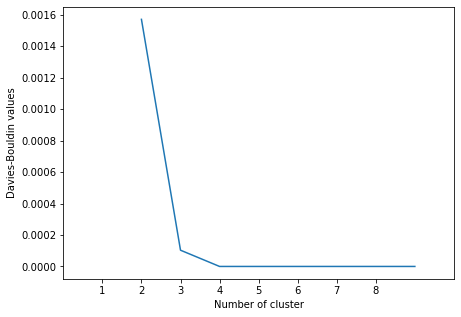

In [284]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xticks([1,2,3,4,5,6,7,8])
plt.xlim(0, 10)
# plt.ylim(0, 5)
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [285]:
optimal_k = 4

In [286]:
kmeans = KMeans(n_clusters=optimal_k, max_iter=10000,random_state=10).fit(X_train.loc[:,["x","y", "z"]])

In [287]:
import collections
labels = kmeans.predict(X_train.loc[:,["x","y", "z"]])
counter = collections.Counter(labels)
X_train['label'] = labels
counter
clusters=[]
for i in range(optimal_k):
    clusters.append(X_train[X_train['label'] == i])
    clusters[i] = clusters[i].reset_index()

# Linear Regression on Entire Data

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
X_train

,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,...,furnish_type_Unfurnished,bedroom,price,area,bathroom,city,x,y,z,label
10646,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,13000.0,1500.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
121,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,25000.0,1800.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
11930,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,14600.0,1753.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
10050,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,20000.0,1200.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
18242,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,14000.0,1100.0,2.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,30000.0,1900.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
14431,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,32000.0,1475.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
4441,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,4.0,35000.0,4000.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0
10503,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,25000.0,1650.0,3.0,Ahmedabad,-214.790509,-214.790509,-846.220404,0


In [289]:
clusters[0]

,index,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,...,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bedroom,price,area,bathroom,x,y,z,label
0,1592,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,2.0,13500.0,1255.0,2.0,-214.790509,-214.790509,-846.220404,0
1,5858,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,23500.0,1354.0,3.0,-214.790509,-214.790509,-846.220404,0
2,13359,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,45000.0,6000.0,5.0,-214.790509,-214.790509,-846.220404,0
3,7600,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,25000.0,1575.0,3.0,-214.790509,-214.790509,-846.220404,0
4,14585,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,16000.0,1435.0,2.0,-214.790509,-214.790509,-846.220404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15084,5018,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,60001.0,2400.0,3.0,-214.790509,-214.790509,-846.220404,0
15085,12749,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,35000.0,3220.0,4.0,-214.790509,-214.790509,-846.220404,0
15086,11843,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,11700.0,1305.0,2.0,-214.790509,-214.790509,-846.220404,0
15087,675,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,18000.0,1985.0,3.0,-214.790509,-214.790509,-846.220404,0


In [290]:
regressors = []
for i in range(len(clusters)):
    y = clusters[i]['price']
    x = clusters[i].drop(['price', 'label', 'x', 'y', 'z', 'index'], axis=1)
    regressor = LinearRegression()
    regressor.fit(x, y)
    regressors.append(regressor)
    y_pred = regressor.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

0.5457032348969448
0.7297691897533612
nan
nan


/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# Let's use regression data for whole file

In [291]:
whole_data_regressor = LinearRegression()

In [292]:
X_train.shape

(16607, 22)

In [293]:
X_train

,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,...,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bedroom,price,area,bathroom,x,y,z,label
1592,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,13500.0,1255.0,2.0,-214.790509,-214.790509,-846.220404,0
5858,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,23500.0,1354.0,3.0,-214.790509,-214.790509,-846.220404,0
13359,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,45000.0,6000.0,5.0,-214.790509,-214.790509,-846.220404,0
7600,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,25000.0,1575.0,3.0,-214.790509,-214.790509,-846.220404,0
14585,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,16000.0,1435.0,2.0,-214.790509,-214.790509,-846.220404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,60001.0,2400.0,3.0,-214.790509,-214.790509,-846.220404,0
12749,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,35000.0,3220.0,4.0,-214.790509,-214.790509,-846.220404,0
11843,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,11700.0,1305.0,2.0,-214.790509,-214.790509,-846.220404,0
675,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,18000.0,1985.0,3.0,-214.790509,-214.790509,-846.220404,0


In [294]:
y_train.shape

(16607, 1)

In [298]:
reg_model = whole_data_regressor.fit(X_train.drop(['price', 'label', 'x', 'y', 'z'], axis=1), y_train)

/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [299]:
y_pred = reg_model.predict(X_train.drop(['price', 'label', 'x', 'y', 'z'], axis=1))
y_pred

/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([[14524.87517819],
       [28487.88235785],
       [90792.13121783],
       ...,
       [12857.64488982],
       [25365.49320244],
       [13486.27645961]])

In [300]:
y_train

,price
1592,13500.0
5858,23500.0
13359,45000.0
7600,25000.0
14585,16000.0
...,...
5018,60001.0
12749,35000.0
11843,11700.0
675,18000.0


In [301]:
r2_score(np.array(y_train), y_pred)

0.5633192986840967

In [302]:
y_pred

array([[14524.87517819],
       [28487.88235785],
       [90792.13121783],
       ...,
       [12857.64488982],
       [25365.49320244],
       [13486.27645961]])

# Trying with Neural Networks to Predict the Price

In [309]:
X_train

,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,...,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bedroom,price,area,bathroom,x,y,z,label
1592,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,13500.0,1255.0,2.0,-214.790509,-214.790509,-846.220404,0
5858,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,23500.0,1354.0,3.0,-214.790509,-214.790509,-846.220404,0
13359,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,45000.0,6000.0,5.0,-214.790509,-214.790509,-846.220404,0
7600,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,25000.0,1575.0,3.0,-214.790509,-214.790509,-846.220404,0
14585,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,16000.0,1435.0,2.0,-214.790509,-214.790509,-846.220404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,60001.0,2400.0,3.0,-214.790509,-214.790509,-846.220404,0
12749,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,35000.0,3220.0,4.0,-214.790509,-214.790509,-846.220404,0
11843,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,11700.0,1305.0,2.0,-214.790509,-214.790509,-846.220404,0
675,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,18000.0,1985.0,3.0,-214.790509,-214.790509,-846.220404,0


In [303]:
import tensorflow as tf
from tensorflow import keras

In [304]:
# ann_models=[]

# import Sequential from keras.models
from keras.models import Sequential

# import Dense from keras.layers
from keras.layers import Dense

def create_model(X_):
# for i in range(optimal_k):
    # initialize the constructor
    model = Sequential()

    # add a densely-connected layer with 64 units to the model
    model.add(Dense(64, activation="relu", input_shape=(X_.shape[1],)))

    # add another layer with 64 units
    model.add(Dense(64, activation="relu"))

    # add an output layer with 1 output unit
    model.add(Dense(1))
    # Using TensorFlow backend.
    # model output shape
    print(model.output_shape)

    # model summary
    print(model.summary())
    return model

### Function to evaluate neural network accuracy

In [305]:
from sklearn.metrics import r2_score
import numpy as np
# evaluate model
def evaluate_model(model, X_, y_, y_pred):
    [mse_reg, mae_reg] = model.evaluate(X_, y_, verbose=1)

    keras_rmse_reg = np.sqrt(int(mse_reg))
    keras_mae_reg = mae_reg

    print("Testing set Root Mean Squared Error: RM{}".format(keras_rmse_reg))
    print("Testing set Mean Absolute Error: RM{}".format(keras_mae_reg))
    
    # calculate R-squared    from sklearn.metrics import r2_score
    keras_r2_dropout = r2_score(y_, y_pred)

    print("Tensorflow with Keras Sequential model R-squared: {}".format(keras_r2_dropout))

In [308]:
ys_pred = []
ann_models = []
for i in range(optimal_k):
    X_= clusters[i].drop(['price', 'label', 'x', 'y', 'z', 'index'], axis=1)
    y_ = clusters[i].loc[:,'price']
    ann_model = create_model(X_)
    ann_model.compile(loss="mse",
          optimizer='adam',
          metrics=["mae"])
    ann_model.fit(X_, y_)
    y_pred = ann_model.predict(X_)
    ys_pred.append(y_pred)
    ann_models.append(ann_model)
    evaluate_model(ann_model, X_, y_, y_pred)

(None, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                1152      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________
None
472/472 [==============================] - 1s 2ms/step - loss: 172680400.0000 - mae: 7418.4336
Testing set Root Mean Squared Error: RM13140.791452572406
Testing set Mean Absolute Error: RM7418.43359375
Tensorflow with Keras Sequential model R-squared: 0.47050123800155974
(None, 1)
Model: "sequential

/home/cyborg/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 135ms/step - loss: 1575692032.0000 - mae: 39694.9883
Testing set Root Mean Squared Error: RM39694.9874921255
Testing set Mean Absolute Error: RM39694.98828125
Tensorflow with Keras Sequential model R-squared: nan


/home/cyborg/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [310]:
# Assuming X_Train is made structured before.
X_whole = X_train.drop(['price', 'x',  'y', 'z', 'label'], axis=1)
y_whole = X_train.loc[:,'price']
ann_model = create_model(X_whole)
ann_model.compile(
    loss="mse",
    optimizer='adam',
    metrics=["mae"]
)
ann_model.fit(X_whole, y_whole)
y_pred_whole = ann_model.predict(X_whole)

(None, 1)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                1152      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________
None
519/519 [==============================] - 1s 2ms/step


In [171]:
evaluate_model(ann_model, X_whole, y_whole, y_pred_whole)

519/519 [==============================] - 1s 2ms/step - loss: 187315904.0000 - mae: 7879.8296
Testing set Root Mean Squared Error: RM13686.340051306632
Testing set Mean Absolute Error: RM7879.82958984375
Tensorflow with Keras Sequential model R-squared: 0.48997220200529457


### Testing on test data

In [311]:
import matplotlib.pyplot as plt

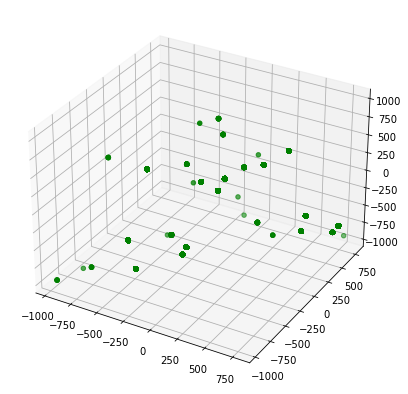

In [312]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot

ax.scatter3D(df_original['x'], df_original['y'], df_original['z'], color = "green")
plt.show()

In [313]:
X_test

,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,layout_type_BHK,layout_type_RK,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,...,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished,bedroom,price,area,bathroom,x,y,z
13937,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,11000.0,1215.0,2.0,-214.790509,-214.790509,-846.220404
7204,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,52000.0,2350.0,3.0,-2.246669,-2.246669,-8.851309
7722,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,15000.0,1450.0,2.0,-214.790509,-214.790509,-846.220404
15567,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,14000.0,1270.0,2.0,-214.790509,-214.790509,-846.220404
711,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,28000.0,2025.0,3.0,-214.790509,-214.790509,-846.220404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15159,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,10000.0,765.0,1.0,-214.790509,-214.790509,-846.220404
9047,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,100000.0,5200.0,4.0,-2.246669,-2.246669,-8.851309
1495,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,16500.0,1860.0,3.0,-214.790509,-214.790509,-846.220404
9769,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,12000.0,915.0,2.0,-214.790509,-214.790509,-846.220404


In [318]:
labels = kmeans.predict(X_test[['x', 'y', 'z']])
X_test['label'] = labels
test_clusters = []
for i in range(optimal_k):
    test_clusters.append(X_test[X_test['label'] == i])
    test_clusters[i] = test_clusters[i].reset_index()

In [319]:
y_pred_test = reg_model.predict(X_test.drop(['price', 'x',  'y', 'z', 'label'], axis=1))

/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [320]:
r2_score(y_test, y_pred_test)

0.5174753229833194

In [321]:
for i in range(optimal_k):
    y_test = test_clusters[i]['price']
    x_test = test_clusters[i].drop(['price', 'x',  'y', 'z', 'label', 'index'], axis=1)
    y_cluster_pred = regressors[i].predict(x_test)
    print(f"For cluster {i}:, r2_score is {r2_score(y_cluster_pred, y_test)}")

/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/cyborg/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


For cluster 0:, r2_score is 0.2101393316636887
For cluster 1:, r2_score is 0.6298969626967516


ValueError: Found array with 0 sample(s) (shape=(0, 17)) while a minimum of 1 is required by LinearRegression.

In [322]:
for i in range(optimal_k):
    y_test = test_clusters[i]['price']
    x_test = test_clusters[i].drop(['price', 'x',  'y', 'z', 'label', 'index'], axis=1)
    y_pred = ann_models[i].predict(x_test)
    evaluate_model(ann_models[i], x_test, y_test, y_pred)

52/52 [==============================] - 0s 2ms/step - loss: 178993040.0000 - mae: 7608.8516
Testing set Root Mean Squared Error: RM13378.828050318907
Testing set Mean Absolute Error: RM7608.8515625
Tensorflow with Keras Sequential model R-squared: 0.43568355834587624
6/6 [==============================] - 0s 3ms/step - loss: 1226542592.0000 - mae: 28705.0352
Testing set Root Mean Squared Error: RM35022.030095355694
Testing set Mean Absolute Error: RM28705.03515625
Tensorflow with Keras Sequential model R-squared: -1.8084760714076733


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [325]:
nnn_whole_test = X_test.drop(['x', 'y', 'z', 'label'], axis=1)

In [330]:
y_pred_test = ann_model.predict(nnn_whole_test.drop(['price'], axis = 1))

58/58 [==============================] - 0s 2ms/step


array([[17268.994],
       [33388.32 ],
       [20599.045],
       ...,
       [26424.139],
       [13011.395],
       [17785.629]], dtype=float32)

In [335]:
evaluate_model(ann_model, nnn_whole_test.drop(['price'], axis=1), y_pred_test, nnn_whole_test['price'])

58/58 [==============================] - 0s 2ms/step - loss: 27597394.0000 - mae: 4359.7891
Testing set Root Mean Squared Error: RM5253.32218695941
Testing set Mean Absolute Error: RM4359.7890625
Tensorflow with Keras Sequential model R-squared: 0.2699047062396911
